# 남성 유저가 많이 본 장르 / 여성 유저가 많이 본 장르

In [1]:
import pandas as pd # 판다스 모듈 갖고오기
import numpy as np # 넘피 모듈 갖고오기
import matplotlib.pyplot as plt # pyplot 모듈 갖고오기
import matplotlib as mpl # matplotlib 패키지 갖고오기
import matplotlib.font_manager as fm # font_manager 갖고오기
import datetime as dt # datatime 모듈 갖고오기

from SampleData import * # SampleData.py의 변수 사용
# anime -> 전처리 완 
# user_details -> 전처리 완 
font_path=r'c:\WINDOWS\Fonts\H2MJRE.TTF' # 한글 출력 설정
myFont=fm.FontProperties(fname=font_path).get_name()
mpl.rc('font',family=myFont)

In [2]:
user_details = user_details[["user_id", "Gender"]]
user_details

,user_id,Gender
0,1,Male
1,3,Male
2,4,Female
3,9,Non-Binary
4,18,Non-Binary
...,...,...
731285,1291083,Non-Binary
731286,1291085,Non-Binary
731287,1291087,Non-Binary
731288,1291091,Non-Binary


In [3]:
user_details = user_details[user_details["Gender"] != "Non-Binary"]

In [4]:
user_details.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 223469 entries, 0 to 731289
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype   
---  ------   --------------   -----   
 0   user_id  223469 non-null  int64   
 1   Gender   223469 non-null  category
dtypes: category(1), int64(1)
memory usage: 3.6 MB


In [5]:
user_score = user_score[["user_id", "anime_id"]]
user_score = user_score.iloc[:100000:100]
user_score

,user_id,anime_id
0,1,21
100,1,186
200,1,169
300,4,30205
400,4,780
...,...,...
99500,1436,664
99600,1436,2246
99700,1437,974
99800,1437,32


In [6]:
user_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 99900
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   user_id   1000 non-null   int64
 1   anime_id  1000 non-null   int64
dtypes: int64(2)
memory usage: 15.8 KB


In [7]:
mergeDF = pd.merge(user_details, user_score)

In [8]:
anime_filter = anime_filter[["anime_id", "Genres"]]

filtered_genre= anime_filter["Genres"].str.split(", ", expand = True)
filtered_genre = filtered_genre.fillna(0)

In [9]:
anime_filter

,anime_id,Genres
0,1,"Action, Adventure, Comedy, Drama, Sci-Fi, Space"
1,5,"Action, Drama, Mystery, Sci-Fi, Space"
2,6,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen"
3,7,"Action, Mystery, Police, Supernatural, Drama, ..."
4,8,"Adventure, Fantasy, Shounen, Supernatural"
...,...,...
14947,48481,"Adventure, Mystery, Supernatural"
14948,48483,"Comedy, Horror, Supernatural"
14949,48488,"Mystery, Dementia, Horror, Psychological, Supe..."
14950,48491,"Adventure, Slice of Life, Comedy"


In [10]:
filtered_genre

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,Action,Adventure,Comedy,Drama,Sci-Fi,Space,0,0,0,0,0,0,0
1,Action,Drama,Mystery,Sci-Fi,Space,0,0,0,0,0,0,0,0
2,Action,Sci-Fi,Adventure,Comedy,Drama,Shounen,0,0,0,0,0,0,0
3,Action,Mystery,Police,Supernatural,Drama,Magic,0,0,0,0,0,0,0
4,Adventure,Fantasy,Shounen,Supernatural,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14947,Adventure,Mystery,Supernatural,0,0,0,0,0,0,0,0,0,0
14948,Comedy,Horror,Supernatural,0,0,0,0,0,0,0,0,0,0
14949,Mystery,Dementia,Horror,Psychological,Supernatural,Thriller,0,0,0,0,0,0,0
14950,Adventure,Slice of Life,Comedy,0,0,0,0,0,0,0,0,0,0


In [11]:
genreDF = pd.concat([pd.DataFrame(anime_filter["anime_id"]), filtered_genre], axis = 1)
genreDF #################

,anime_id,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1,Action,Adventure,Comedy,Drama,Sci-Fi,Space,0,0,0,0,0,0,0
1,5,Action,Drama,Mystery,Sci-Fi,Space,0,0,0,0,0,0,0,0
2,6,Action,Sci-Fi,Adventure,Comedy,Drama,Shounen,0,0,0,0,0,0,0
3,7,Action,Mystery,Police,Supernatural,Drama,Magic,0,0,0,0,0,0,0
4,8,Adventure,Fantasy,Shounen,Supernatural,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14947,48481,Adventure,Mystery,Supernatural,0,0,0,0,0,0,0,0,0,0
14948,48483,Comedy,Horror,Supernatural,0,0,0,0,0,0,0,0,0,0
14949,48488,Mystery,Dementia,Horror,Psychological,Supernatural,Thriller,0,0,0,0,0,0,0
14950,48491,Adventure,Slice of Life,Comedy,0,0,0,0,0,0,0,0,0,0


In [12]:
# mergeDF = pd.merge(mergeDF, anime_filter)
mergeDF

,user_id,Gender,anime_id
0,1,Male,21
1,1,Male,186
2,1,Male,169
3,4,Female,30205
4,4,Female,780
...,...,...,...
757,1431,Female,150
758,1434,Male,272
759,1437,Male,974
760,1437,Male,32


In [13]:
mergeDF[mergeDF["Gender"] == "Non-Binary"]
# 다 걸러진 거 확인 

,user_id,Gender,anime_id


In [14]:
# 최종 DF
mergeDF = pd.merge(mergeDF, genreDF)
mergeDF

,user_id,Gender,anime_id,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1,Male,21,Action,Adventure,Comedy,Super Power,Drama,Fantasy,Shounen,0,0,0,0,0,0
1,1385,Male,21,Action,Adventure,Comedy,Super Power,Drama,Fantasy,Shounen,0,0,0,0,0,0
2,1,Male,186,Action,Cars,Drama,Seinen,Sports,0,0,0,0,0,0,0,0
3,1,Male,169,Action,Horror,Mystery,Romance,Super Power,Supernatural,Vampire,0,0,0,0,0,0
4,4,Female,30205,Action,Comedy,Sports,Shounen,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
753,1425,Female,565,Action,Military,Sci-Fi,Adventure,Historical,Drama,0,0,0,0,0,0,0
754,1431,Female,150,Action,Military,Mystery,Horror,Supernatural,Drama,Vampire,0,0,0,0,0,0
755,1434,Male,272,Action,Mystery,Drama,0,0,0,0,0,0,0,0,0,0
756,1437,Male,974,Adventure,Psychological,Comedy,Sci-Fi,0,0,0,0,0,0,0,0,0


In [15]:
mergeDF["Gender"][1]

'Male'

In [16]:
Male_dict = dict()
Female_dict = dict()
temp = mergeDF.T.loc[0:12].T
for idx in mergeDF.index:
    # print(temp.iloc[idx].unique())
    gList = temp.iloc[idx].unique()
    for g in gList:
        if mergeDF["Gender"][idx] == "Male": # 남성 유저라면
            if g in Male_dict.keys():        # 요소가 key값에 있다면 value += 1
                Male_dict[g] +=1
            else:                            # 요소가 key값에 없다면
                Male_dict[g] = 1 
        else:                                # 여성 유저라면
            if g in Female_dict.keys():
                Female_dict[g] +=1
            else:                            # 요소가 key값에 없다면
                Female_dict[g] = 1 

Female_dict.pop(0)
Male_dict.pop(0) # 결측치는 모두 0이기 때문에 Key 0을 제거
print(Female_dict)
print("\n\n")
print(Male_dict)


{'Action': 108, 'Comedy': 130, 'Sports': 10, 'Shounen': 66, 'Adventure': 70, 'Mystery': 35, 'Police': 14, 'School': 36, 'Seinen': 24, 'Slice of Life': 38, 'Ecchi': 19, 'Fantasy': 82, 'Magic': 30, 'Shoujo Ai': 4, 'Drama': 99, 'Super Power': 21, 'Supernatural': 64, 'Romance': 72, 'Shoujo': 23, 'Mecha': 28, 'Psychological': 21, 'Sci-Fi': 76, 'Parody': 7, 'Music': 9, 'Vampire': 8, 'Historical': 20, 'Thriller': 5, 'Horror': 20, 'Demons': 9, 'Shounen Ai': 2, 'Kids': 8, 'Samurai': 5, 'Game': 7, 'Military': 16, 'Martial Arts': 2, 'Josei': 2, 'Harem': 10, 'Space': 5, 'Hentai': 3, 'Yaoi': 3, 'Dementia': 7, 'Cars': 1}



{'Action': 200, 'Adventure': 128, 'Comedy': 237, 'Super Power': 39, 'Drama': 151, 'Fantasy': 138, 'Shounen': 139, 'Cars': 5, 'Seinen': 50, 'Sports': 18, 'Horror': 16, 'Mystery': 59, 'Romance': 135, 'Supernatural': 85, 'Vampire': 9, 'Ecchi': 49, 'Martial Arts': 14, 'School': 86, 'Psychological': 32, 'Military': 46, 'Magic': 51, 'Shoujo Ai': 6, 'Shoujo': 17, 'Slice of Life': 64, 'P

In [17]:
# pd.Series((Male_dict))
FemaleDF = pd.DataFrame(pd.Series(Female_dict))
FemaleDF

,0
Action,108
Comedy,130
Sports,10
Shounen,66
Adventure,70
Mystery,35
Police,14
School,36
Seinen,24
Slice of Life,38


In [18]:
# pd.Series((Male_dict))
MaleDF = pd.DataFrame(pd.Series(Male_dict))
MaleDF

,0
Action,200
Adventure,128
Comedy,237
Super Power,39
Drama,151
Fantasy,138
Shounen,139
Cars,5
Seinen,50
Sports,18


In [19]:
MaleDF

,0
Action,200
Adventure,128
Comedy,237
Super Power,39
Drama,151
Fantasy,138
Shounen,139
Cars,5
Seinen,50
Sports,18


In [20]:
genre_translation = {
    'Comedy': '코미디',
    'Fantasy': '판타지',
    'Action': '액션',
    'Adventure': '모험',
    'Sci-Fi': '과학 소설',
    'Drama': '드라마',
    'Romance': '로맨스',
    'Slice of Life': '일상',
    'Supernatural': '초자연적인',
    'Hentai': '헨타이',
    'Mystery': '미스터리',
    'Avant Garde': '아방가르드',
    'Ecchi': '에치',
    'Sports': '스포츠',
    'Horror': '호러',
    'Suspense': '서스펜스',
    'Award Winning': '수상작',
    'Boys Love': '보이즈 러브',
    'Gourmet': '미식',
    'Girls Love': '걸즈 러브',
    'Erotica': '에로티카',
    'Shounen': '소년',
    'Police' : '경찰',
    'School' : '학원',
    'Seinen' : '청년',
    'Magic' : '마법',
    'Shoujo Ai': '소녀 AI',
    'Super Power' : "초능력",
    'Shoujo' : "소녀",
    'Mecha' : '로봇',
    'Psychological' : '심리',
    'Parody' : "패러디",
    'Music' : "음악",
    "Vampire" : "뱀파이어",
    "Historical" : "역사",
    "Thriller" : "스릴러",
    "Demons" : "악마",
    'Shounen Ai' : "소년 AI",
    "Kids" : "아동",
    "Samurai" : "사무라이",
    "Game" : "게임",
    "Military" : "밀리터리"
}

In [21]:
add_col=[]
for i in (FemaleDF.index) : 
    if i in genre_translation.keys():
        add_col.append(genre_translation[i])
    else:
        add_col.append(i)
FemaleDF.index=add_col # 키값을 영어에서 한국어로 바꿈

add_col=[]
for i in (MaleDF.index) : 
    if i in genre_translation.keys():
        add_col.append(genre_translation[i])
    else:
        add_col.append(i)
MaleDF.index=add_col # 키값을 영어에서 한국어로 바꿈

In [22]:
FemaleDF.rename(columns={0:"Female Genre"}, inplace=True)

In [23]:
MaleDF.rename(columns={0:"Male Genre"}, inplace=True)

In [31]:
Malegraph = MaleDF.T.sort_values(by="Male Genre", ascending=False, axis=1).T.head(10) # DF

In [38]:
Malegraph["Male Genre"]

코미디      237
액션       200
드라마      151
소년       139
판타지      138
과학 소설    135
로맨스      135
모험       128
학원        86
초자연적인     85
Name: Male Genre, dtype: int64

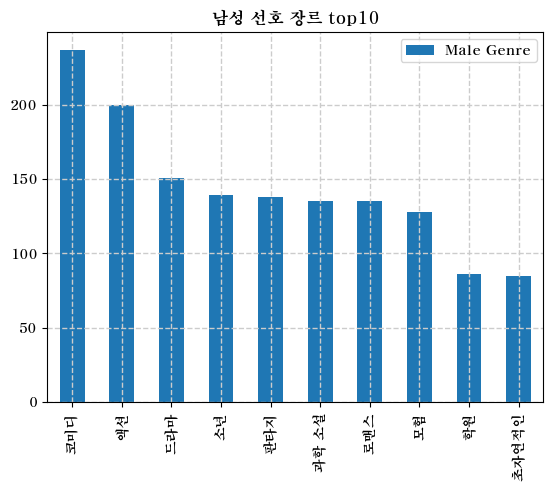

In [24]:
# 
MaleDF.T.sort_values(by="Male Genre", ascending=False, axis=1).T.head(10).plot(kind='bar')
plt.grid(True, lw=1, ls="--", c=".8")
plt.legend()
plt.title(f"남성 선호 장르 top10")
plt.show()
# pd.Series((Male_dict)).T.sort_values(ascending=False).head(10).plost(kind='pie')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


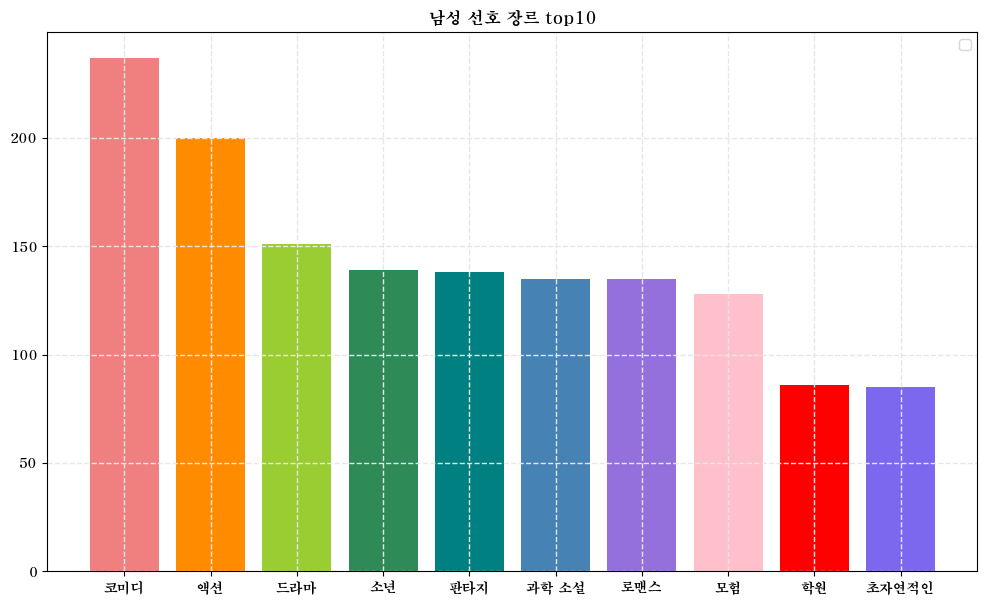

In [81]:
plt.figure(figsize=(12,7))
Malegraph = MaleDF.T.sort_values(by="Male Genre", ascending=False, axis=1).T.head(10) # DF
plt.bar(Malegraph.index, Malegraph["Male Genre"], color=["lightcoral", "darkorange", 'yellowgreen', "seagreen", 'teal', 'steelblue', 'mediumpurple', "pink", "r", "mediumslateblue"])
plt.grid(True, lw=1, ls="--", c=".9")
plt.legend()
plt.title(f"남성 선호 장르 top10")
plt.show()
# pd.Series((Male_dict)).T.sort_values(ascending=False).head(10).plost(kind='pie')
# ["lightcoral", "darkorange", 'yellowgreen', "seagreen", 'teal', 'steelblue', 'mediumpurple', "pink", "plum", "mediumslateblue"]
# 코미디            액션             드라마      소년        판타지     SF        로맨스        모험       학원     초자연

In [71]:
# ["lightcoral", "darkorange", 'yellowgreen', "seagreen", 'teal', 'steelblue', 'mediumpurple', "pink", "plum", "mediumslateblue"]
# 코미디            액션             드라마      소년        판타지     SF        로맨스        모험         학원!   초자연
# ["lightcoral", "darkorange", 'yellowgreen', 'teal',  'steelblue', 'mediumpurple', "pink",  "seagreen", "mediumslateblue", "plum"   ]
# 코미디            액션             드라마      판타지      SF          로맨스         모험      소년    초자연            일상!

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Text(0.5, 1.0, '여성 선호 장르 top10')

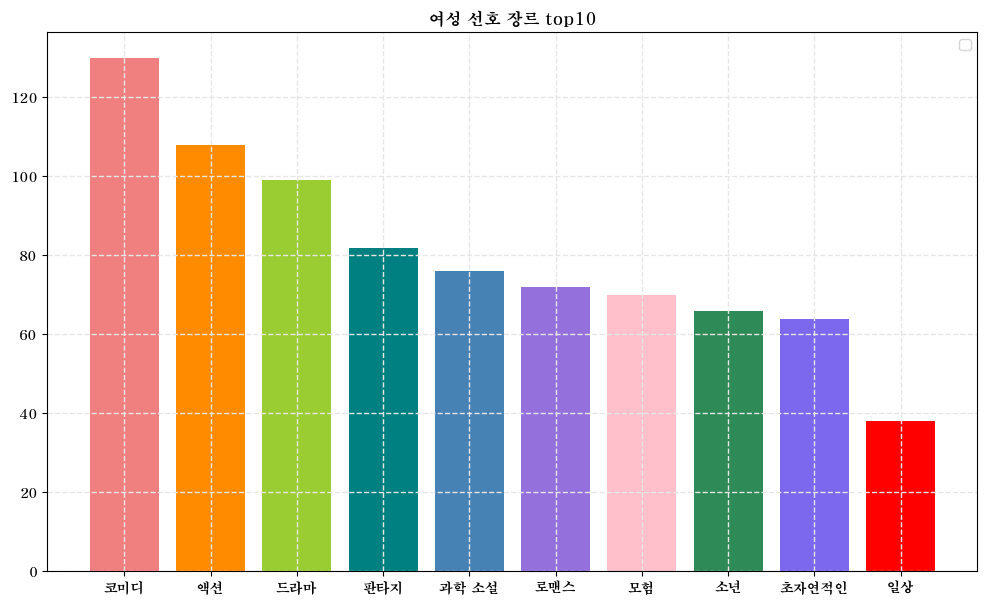

In [80]:
plt.figure(figsize=(12,7))
Femalegraph = FemaleDF.T.sort_values(by="Female Genre", ascending=False, axis=1).T.head(10) # DF
plt.bar(Femalegraph.index, Femalegraph["Female Genre"], color=["lightcoral", "darkorange", 'yellowgreen', 'teal',  'steelblue', 'mediumpurple', "pink",  "seagreen", "mediumslateblue", "r"   ])
plt.grid(True, lw=1, ls="--", c=".9")
plt.legend()
plt.title(f"여성 선호 장르 top10")


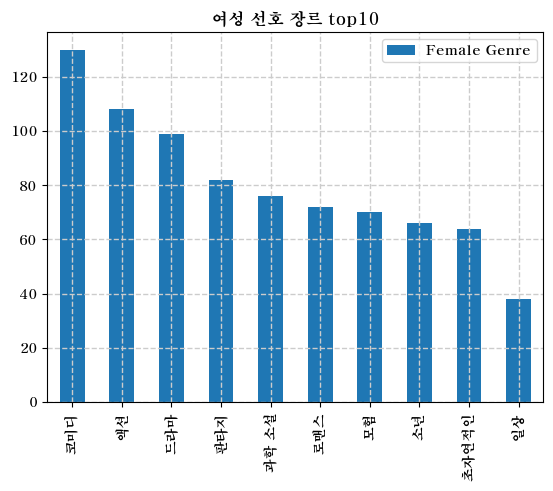

In [25]:
# 
FemaleDF.T.sort_values(by="Female Genre", ascending=False, axis=1).T.head(10).plot(kind='bar')
plt.grid(True, lw=1, ls="--", c=".8")
plt.legend()
plt.title(f"여성 선호 장르 top10")
plt.show()
# pd.Series((Male_dict)).T.sort_values(ascending=False).head(10).plost(kind='pie')

In [26]:
FemaleDF.corr()

,Female Genre
Female Genre,1.0


# 끝